In [18]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
workingFolderPath = os.path.join(os.getcwd(), "newData")
originalDAMFolderPath = os.path.join(os.getcwd(), "data", "DAM")
rawNewDAMFolderPath = os.path.join(os.getcwd(), "newData", "RawNewDAM")

In [20]:
def resize_images(working_folder, input_folder, output_folder, size=(256, 256)):
    """
    Resize images from the input folder and save them to the output folder.
    
    Parameters:
        working_folder (str): The root directory to work in.
        input_folder (str): Relative path to the folder containing input images.
        output_folder (str): Relative path to the folder to save resized images.
        size (tuple): Target size for resizing, default is (256, 256).
    """
    input_path = os.path.join(working_folder, input_folder)
    output_path = os.path.join(working_folder, output_folder)

    # Create the output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Process each file in the input folder
    for file_name in os.listdir(input_path):
        input_file_path = os.path.join(input_path, file_name)
        
        # Check if the file is an image
        if os.path.isfile(input_file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                # Open the image
                with Image.open(input_file_path) as img:
                    # Resize the image
                    resized_img = img.resize(size)
                    
                    # Save the resized image to the output path
                    output_file_path = os.path.join(output_path, file_name)
                    resized_img.save(output_file_path)

                    print(f"Resized and saved: {file_name}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
        else:
            print(f"Skipped: {file_name} (not an image)")

# Example usage
input_folder = "RawNewDAM"
output_folder = "ResizedDAM"

resize_images(workingFolderPath, input_folder, output_folder)





Resized and saved: KCK276NKRS900.jpeg
Resized and saved: KCK278BCRS29W.jpeg
Resized and saved: S5654CCEHM68P.jpeg


In [21]:
def plot_grouped_images_by_name(folder_list):
    """
    Plots images grouped by identical names from specified folders.

    Parameters:
        folder_list (list): List of folder names relative to the working folder.
        working_folder (str): Root directory containing the folders.
    """
    # Get absolute paths for the folders
    folder_paths = folder_list
    
    # Ensure all folders exist
    for folder in folder_paths:
        if not os.path.exists(folder):
            print(f"Folder not found: {folder}")
            return
    
    # Get the set of image files common to all folders
    common_files = set(os.listdir(folder_paths[0]))
    for folder in folder_paths[1:]:
        common_files &= set(os.listdir(folder))
    
    # Filter out non-image files
    common_files = {f for f in common_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))}

    if not common_files:
        print("No common images found across all folders.")
        return

    # Plot images grouped by identical names
    for file_name in sorted(common_files):
        fig, axes = plt.subplots(1, len(folder_paths), figsize=(15, 5))
        fig.suptitle(file_name, fontsize=16)
        
        for idx, folder_path in enumerate(folder_paths):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path)
                axes[idx].imshow(img)
                axes[idx].axis("off")
                axes[idx].set_title(f"Folder: {folder_list[idx]}")
            except Exception as e:
                axes[idx].set_title(f"Error: {e}")
                axes[idx].axis("off")
        
        plt.show()



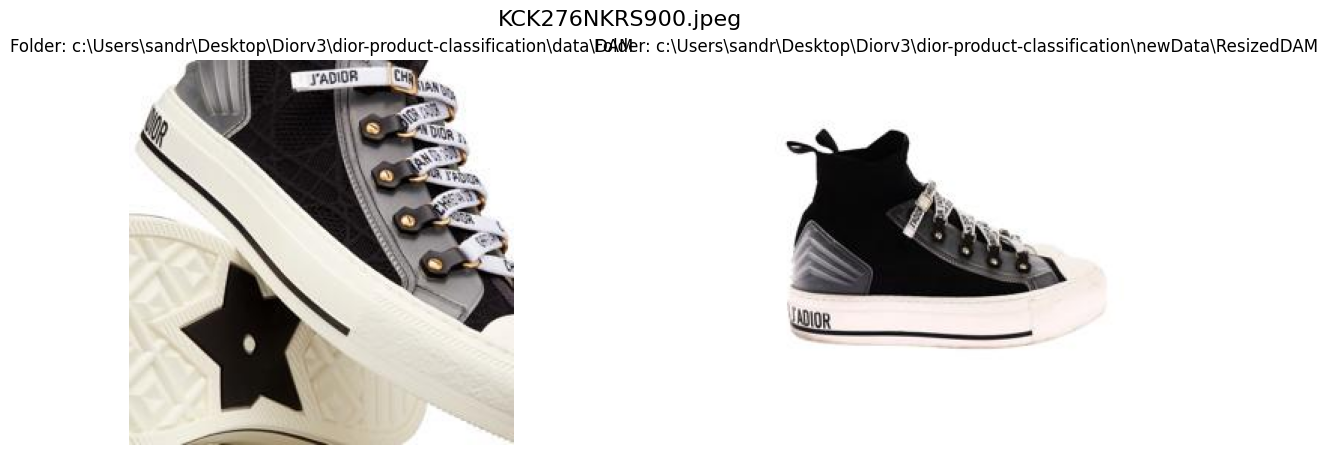

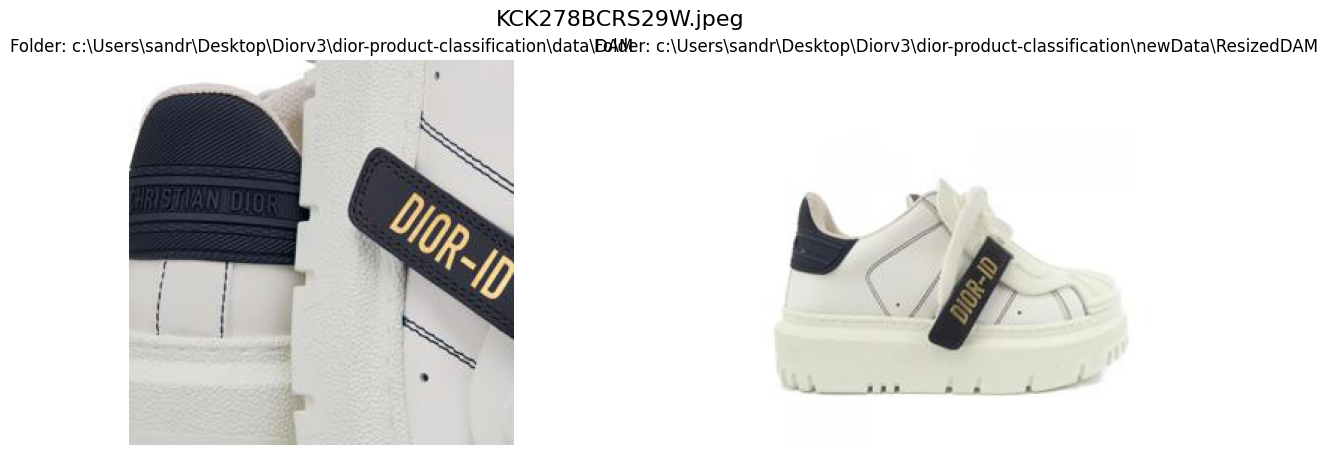

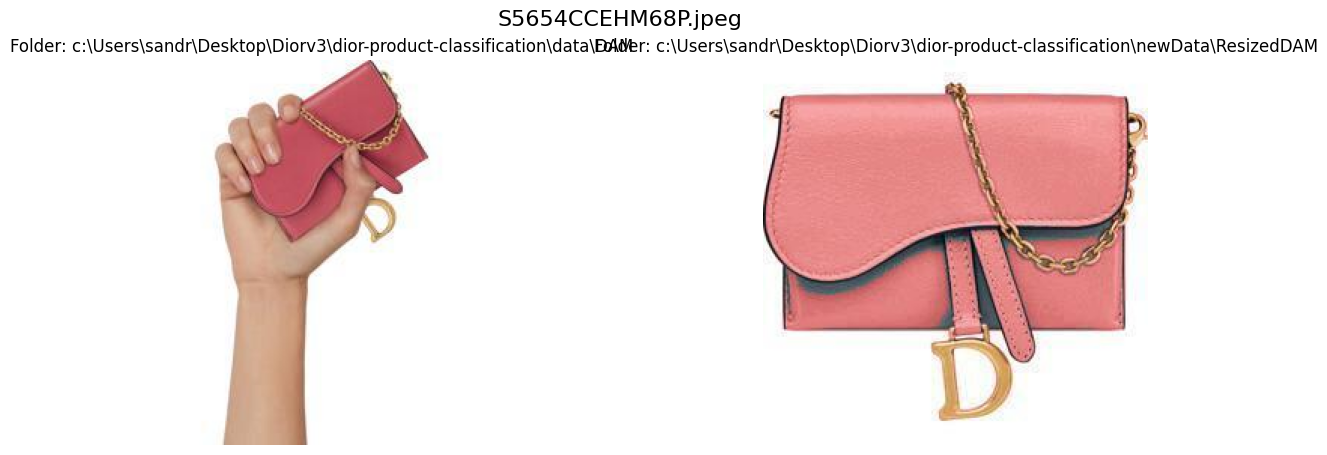

In [22]:
resizedFolderPaths = os.path.join(workingFolderPath, "ResizedDAM")

folders = [originalDAMFolderPath, resizedFolderPaths]
plot_grouped_images_by_name(folders)

In [23]:
TODO = [
    "S0981ONMJM030",
    "S5619CTZQM51E",
    "M9204UAYCM61E",
    "KCQ835LAMS49K",
    "DSGTS1UXR26A1",
    "DSGTS2UXR20B0",
    "954E51AM509X6808",
    "B0292UWFRM030",
    "317C27A3905X9000",
    "81ABC106X600C702",
    "86MAS106I600C412"
]

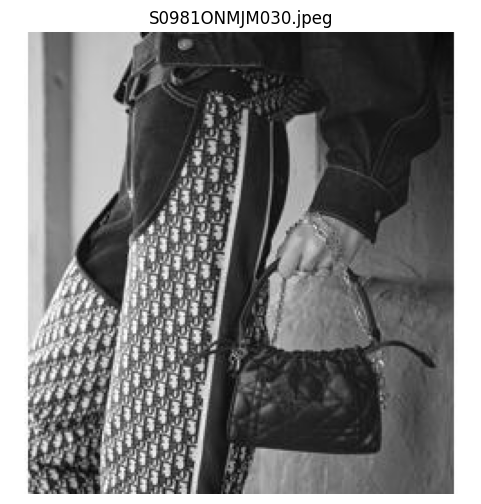

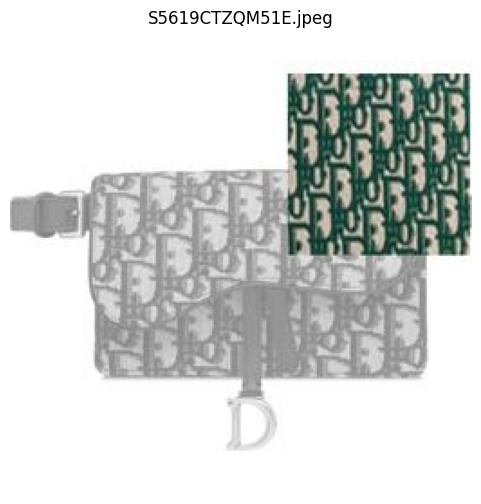

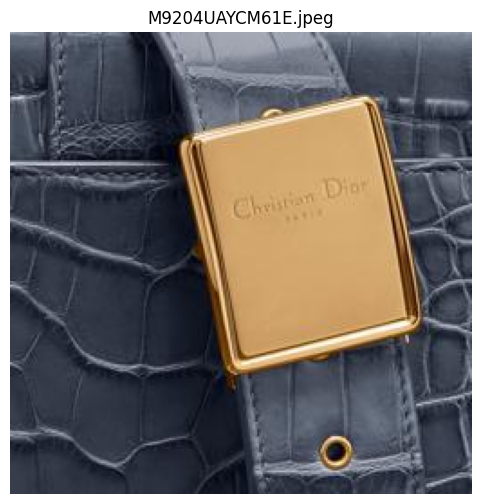

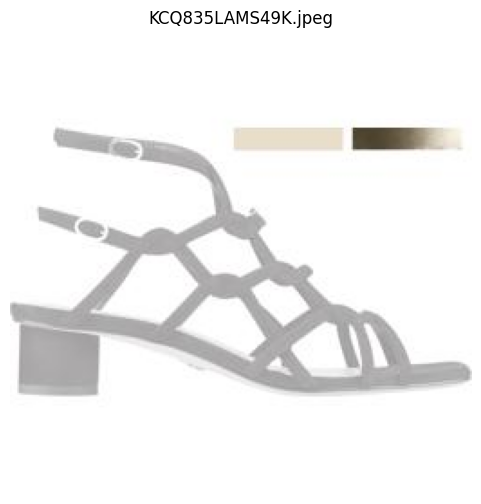

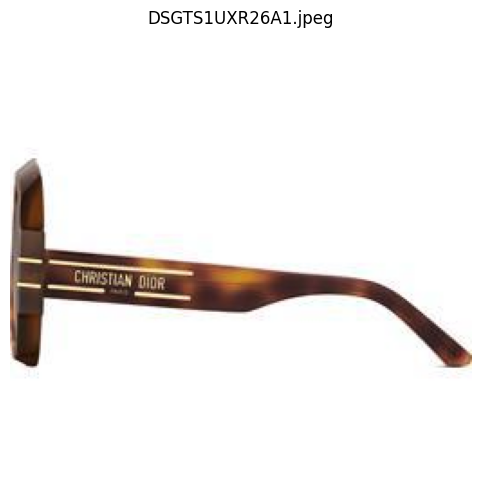

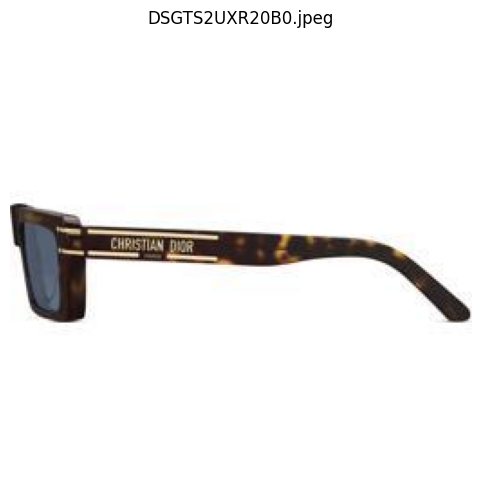

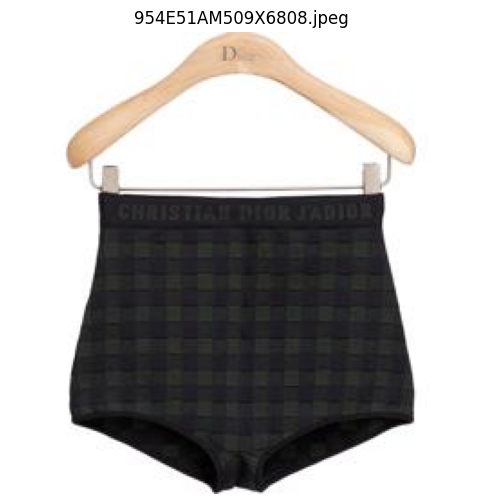

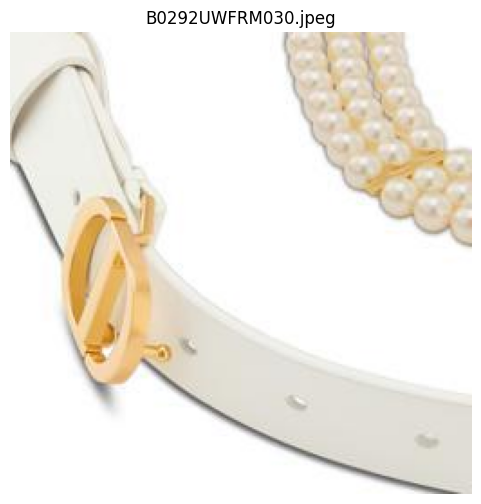

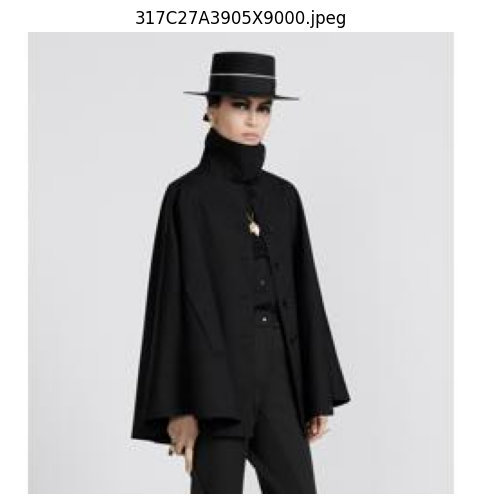

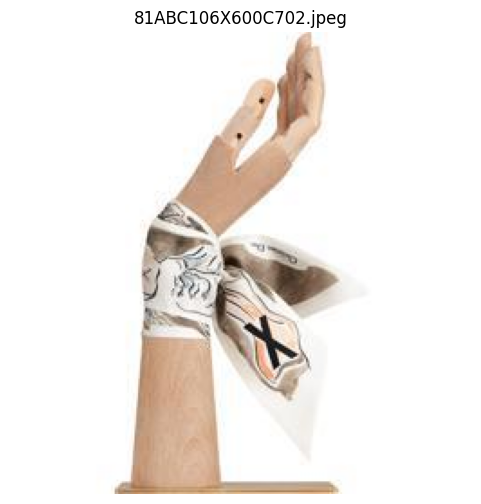

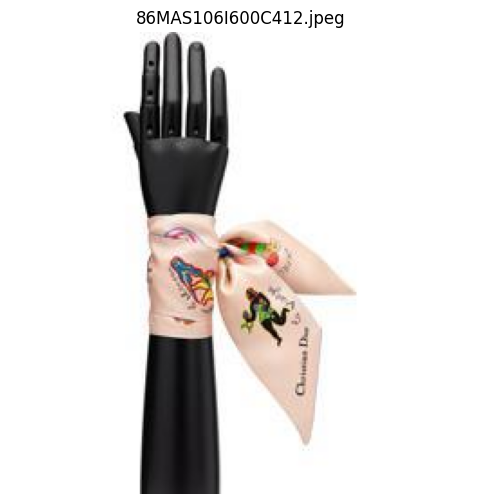

In [24]:
def plot_images_from_todo(folder_name, todo_list, extensions=None):
    """
    Plots images from the TODO list found in a single folder, trying different file extensions.

    Parameters:
        working_folder (str): Root directory containing the folder.
        folder_name (str): Name of the folder relative to the working folder.
        todo_list (list): List of image names (without extensions) to plot.
        extensions (list): List of file extensions to try (e.g., ['.png', '.jpg', '.jpeg']).
    """
    if extensions is None:
        extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.gif']  # Default extensions

    # Get the absolute path for the folder
    folder_path = folder_name

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder not found: {folder_path}")
        return

    # Iterate through the TODO list
    for base_name in todo_list:
        found_file = None
        for ext in extensions:
            file_path = os.path.join(folder_path, base_name + ext)
            if os.path.isfile(file_path):
                found_file = file_path
                break

        if found_file:
            try:
                # Open and plot the image
                img = Image.open(found_file)
                plt.figure(figsize=(6, 6))
                plt.imshow(img)
                plt.axis("off")
                plt.title(f"{base_name}{ext}")
                plt.show()
            except Exception as e:
                print(f"Error displaying {base_name}{ext}: {e}")
        else:
            print(f"File not found: {base_name} with extensions {extensions}")

plot_images_from_todo(originalDAMFolderPath, TODO)
